In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.tail()   

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [5]:
df["hypertension"].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [6]:
df["heart_disease"].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [7]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [8]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [9]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [10]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df = df.drop(df[df["bmi"].isna()].index)
df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [16]:
df.corr(numeric_only = True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [17]:
df = df.drop(df[df["gender"] == "Other"].index)
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [19]:
df = df.drop("id", axis = 1)
df.reset_index(drop=True, inplace=True)

In [20]:
def show_value_counts(df, columns):
    for col in columns:
        print(f"\n--- {col} sütunu: ---")
        print(df[col].value_counts())

In [21]:
cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
show_value_counts(df, cols)


--- gender sütunu: ---
gender
Female    2897
Male      2011
Name: count, dtype: int64

--- ever_married sütunu: ---
ever_married
Yes    3204
No     1704
Name: count, dtype: int64

--- work_type sütunu: ---
work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

--- Residence_type sütunu: ---
Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64

--- smoking_status sütunu: ---
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64


In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [23]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4907,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [24]:
df["stroke"].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

Text(0.5, 1.0, 'Yaş Dağılımı (Stroke Olan / Olmayan)')

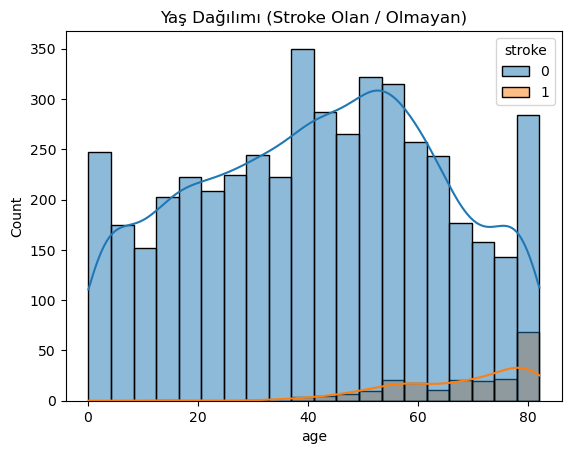

In [25]:
sns.histplot(data = df, x = "age", hue = "stroke", kde = True)
plt.title("Yaş Dağılımı (Stroke Olan / Olmayan)")

Text(0.5, 1.0, 'Cinsiyete Göre Stroke Dağılımı')

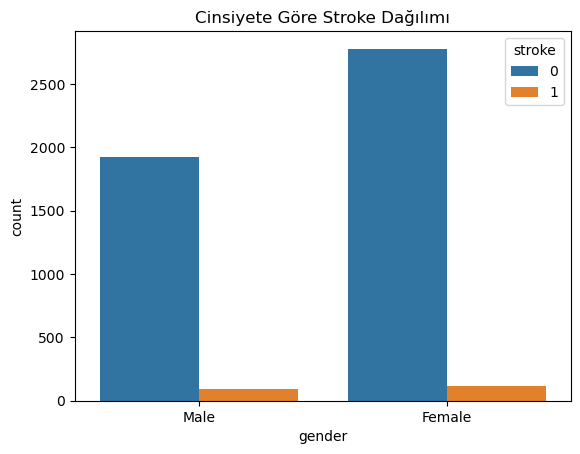

In [26]:
sns.countplot(data = df, x = "gender", hue = "stroke")
plt.title("Cinsiyete Göre Stroke Dağılımı")

Text(0.5, 1.0, 'Evlilik Durumuna Göre Stroke Dağılımı')

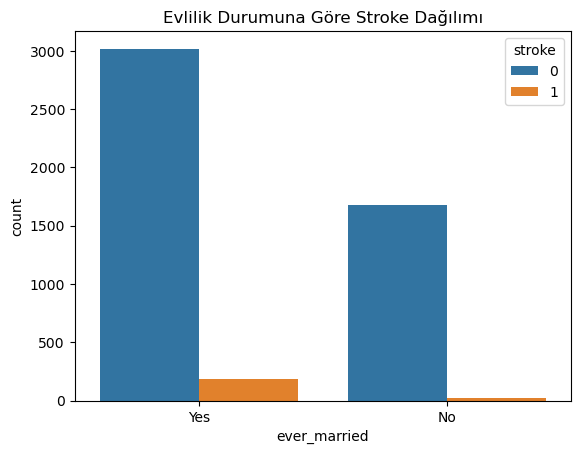

In [27]:
sns.countplot(data = df, x = "ever_married", hue = "stroke")
plt.title("Evlilik Durumuna Göre Stroke Dağılımı")

Text(0.5, 1.0, 'Yaşam Alanına Göre Stroke Dağılımı')

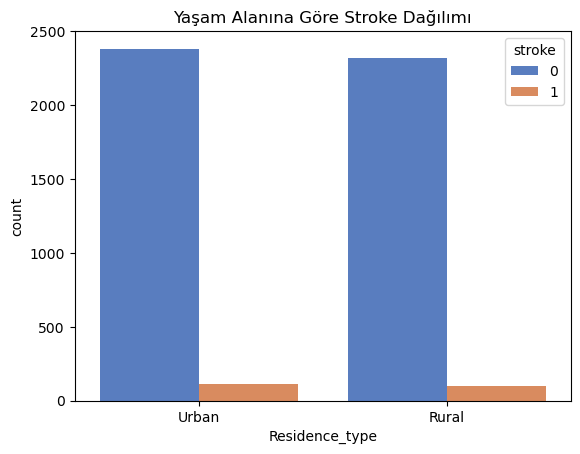

In [28]:
sns.countplot(data=df, x="Residence_type", hue="stroke", palette="muted")
plt.title("Yaşam Alanına Göre Stroke Dağılımı")

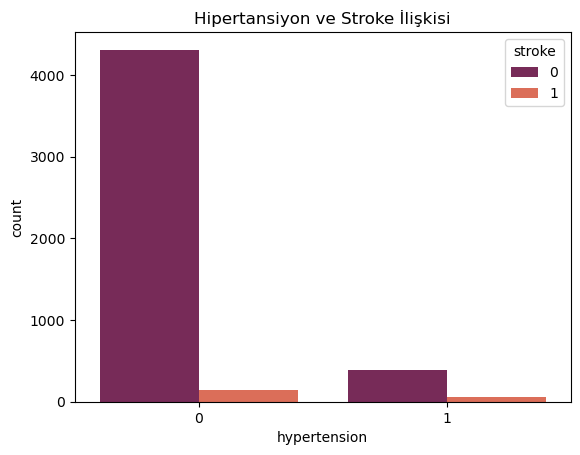

In [29]:
sns.countplot(data=df, x="hypertension", hue="stroke", palette="rocket")
plt.title("Hipertansiyon ve Stroke İlişkisi")
plt.show()

Text(0.5, 1.0, 'Kalp Hastalığı ve Stroke İlişkisi')

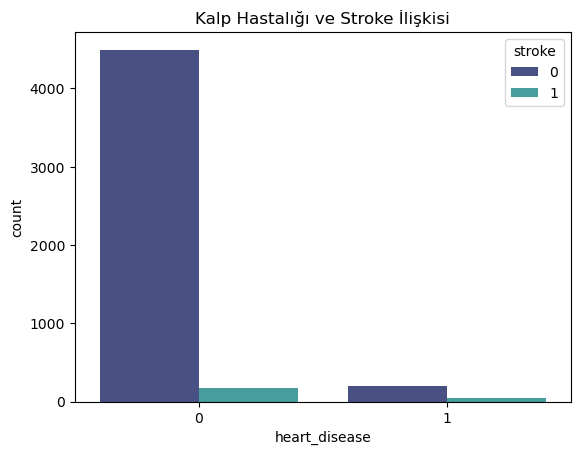

In [30]:
sns.countplot(data=df, x="heart_disease", hue="stroke", palette="mako")
plt.title("Kalp Hastalığı ve Stroke İlişkisi")

C:\Users\sevva\AppData\Local\Temp\ipykernel_25708\2244802678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y="avg_glucose_level", palette="coolwarm")


Text(0.5, 1.0, 'Ortalama Glikoz Seviyesi ve Stroke İlişkisi')

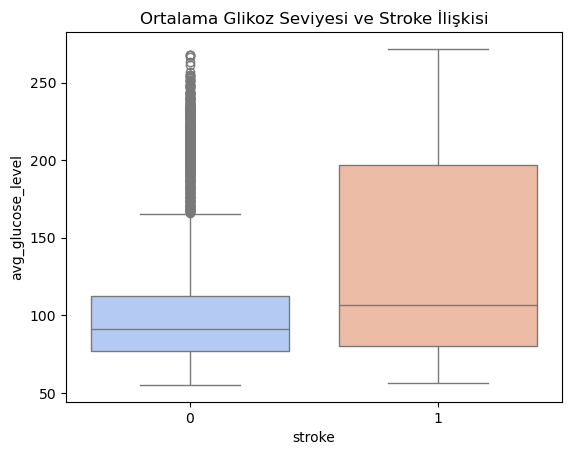

In [31]:
sns.boxplot(data=df, x="stroke", y="avg_glucose_level", palette="coolwarm")
plt.title("Ortalama Glikoz Seviyesi ve Stroke İlişkisi")

In [32]:
df[(df["avg_glucose_level"] > 230) & (df["stroke"] == 1)].shape

(17, 11)

In [33]:
df[(df["avg_glucose_level"] > 230) & (df["stroke"] == 0)].shape

(91, 11)

In [34]:
df = df[~(df["avg_glucose_level"] > 230)]
df.reset_index(drop=True, inplace=True)

In [35]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4795,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4796,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4797,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4798,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4799,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


C:\Users\sevva\AppData\Local\Temp\ipykernel_25708\3085910257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y="bmi", palette="coolwarm")


Text(0.5, 1.0, 'BMI Dağılımı (Stroke Olan / Olmayan)')

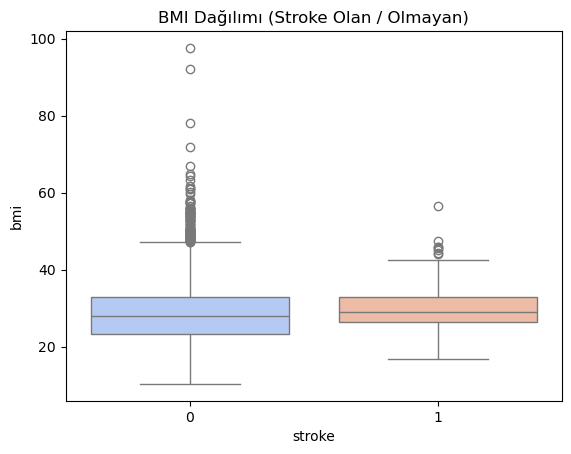

In [36]:
sns.boxplot(data=df, x="stroke", y="bmi", palette="coolwarm")
plt.title("BMI Dağılımı (Stroke Olan / Olmayan)")

In [37]:
df[(df["bmi"] > 45) & (df["stroke"] == 0)].shape

(141, 11)

In [38]:
df[(df["bmi"] > 45) & (df["stroke"] == 1)].shape

(5, 11)

In [39]:
df = df[~(df["bmi"] > 45)]
df.reset_index(drop = True, inplace=True)

In [40]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4649,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4650,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4651,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4652,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4653,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Text(0.5, 1.0, 'İş Tipine Göre Stroke Dağılımı')

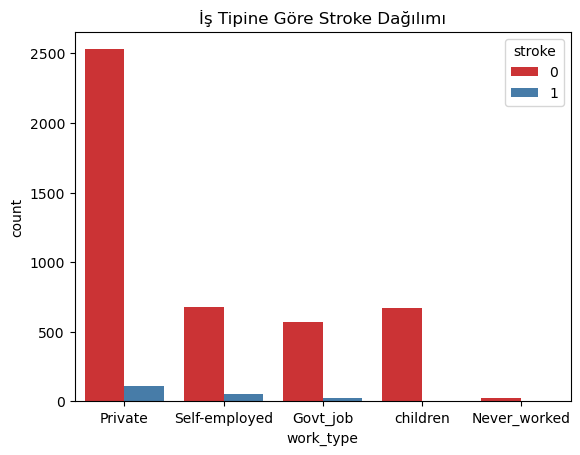

In [41]:
sns.countplot(data=df, x="work_type", hue="stroke", palette="Set1")
plt.title("İş Tipine Göre Stroke Dağılımı")

Text(0.5, 1.0, 'Sigara Kullanım Durumuna Göre Stroke Dağılımı')

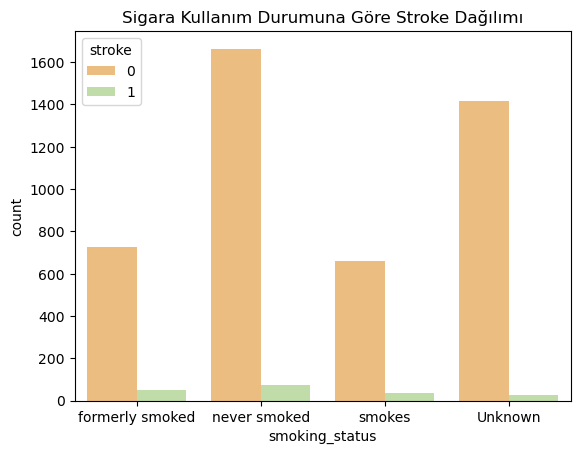

In [42]:
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="Spectral")
plt.title("Sigara Kullanım Durumuna Göre Stroke Dağılımı")

In [43]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=np.number).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

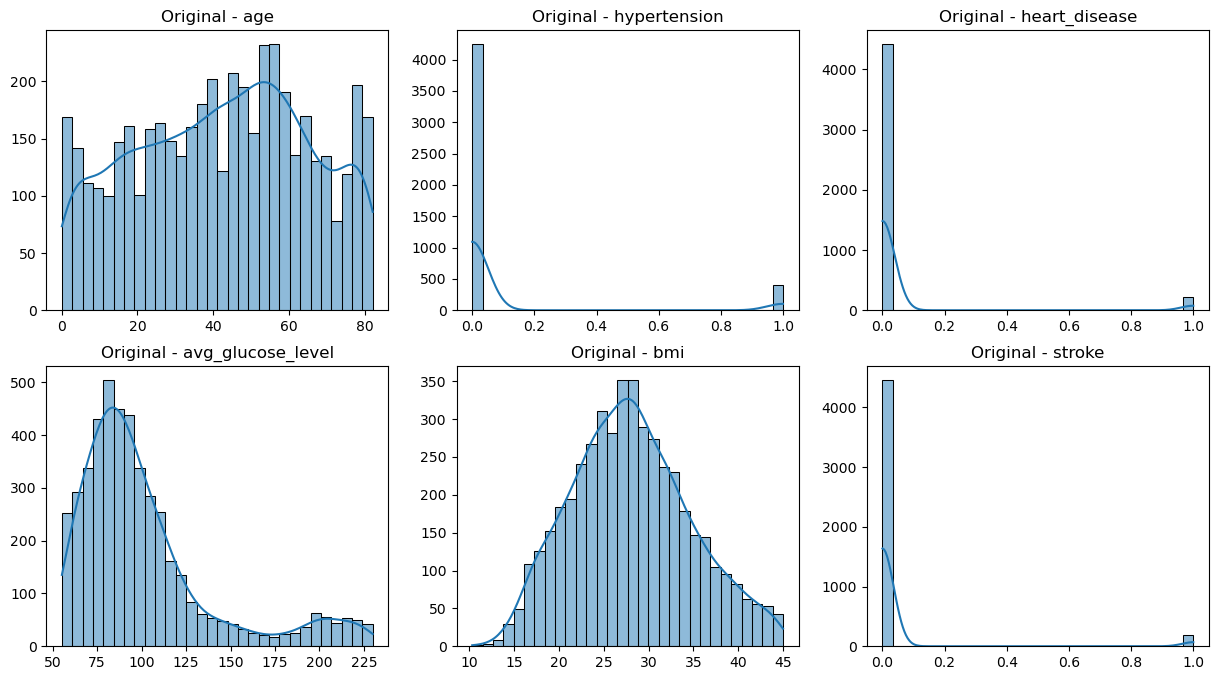

In [44]:
plot_all_histograms(df, title_prefix="Original - ")

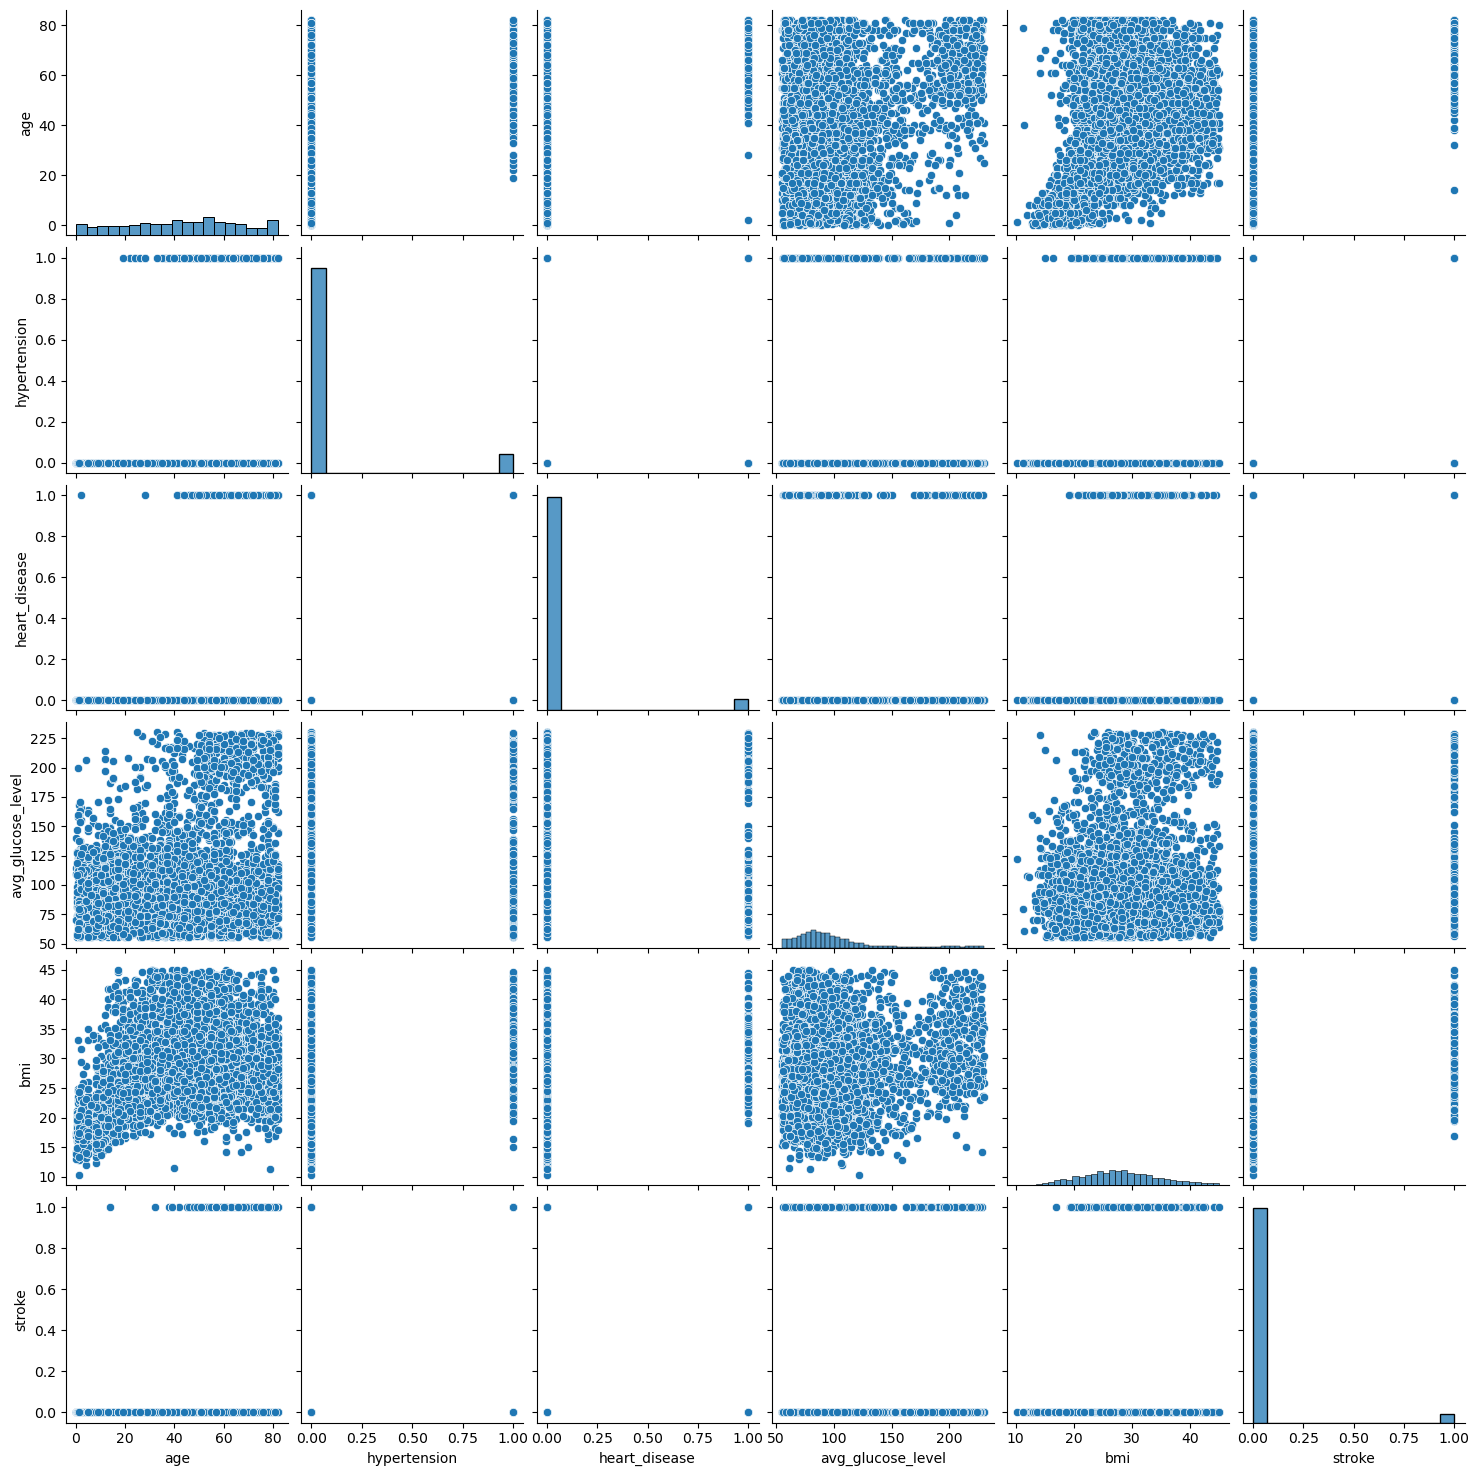

In [45]:
sns.pairplot(df)
plt.show()

In [46]:
df["stroke"].value_counts()

stroke
0    4467
1     187
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()

In [49]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4649,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4650,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4651,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4652,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [50]:
df["gender"] = label_encoder.fit_transform(df["gender"])                  #female 0, male 1
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])      #no 0, yes 1
df["work_type"] = label_encoder.fit_transform(df["work_type"])            #Govt_job 0, Never_worked 1, Private 2, Self-employed 3, children 4 
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])  #Rural 0, Urban 1
df["smoking_status"] = label_encoder.fit_transform(df["smoking_status"])  #Unknown 0, formerly smoked 1, never smoked 2, smokes 3 

In [51]:
cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
show_value_counts(df, cols)


--- gender sütunu: ---
gender
0    2727
1    1927
Name: count, dtype: int64

--- ever_married sütunu: ---
ever_married
1    2991
0    1663
Name: count, dtype: int64

--- work_type sütunu: ---
work_type
2    2638
3     727
4     671
0     596
1      22
Name: count, dtype: int64

--- Residence_type sütunu: ---
Residence_type
1    2369
0    2285
Name: count, dtype: int64

--- smoking_status sütunu: ---
smoking_status
2    1736
0    1444
1     780
3     694
Name: count, dtype: int64


In [52]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4649,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4650,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4651,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4652,1,51.0,0,0,1,2,0,166.29,25.6,1,0
4653,0,44.0,0,0,1,0,1,85.28,26.2,0,0


In [53]:
#SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample = SMOTE()

In [56]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [57]:
X, y = oversample.fit_resample(df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']],df['stroke'])

In [58]:
X.shape

(8934, 10)

In [59]:
y.value_counts()

stroke
1    4467
0    4467
Name: count, dtype: int64

In [60]:
df1 = pd.DataFrame(X, columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
df2 = pd.DataFrame(y, columns = ["stroke"])
oversample_df = pd.concat([df1, df2], axis = 1)

In [61]:
oversample_df["stroke"].value_counts()

stroke
1    4467
0    4467
Name: count, dtype: int64

In [62]:
df = oversample_df.copy()

In [63]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8929,1,73.392529,0,0,1,0,0,219.726075,30.601897,1,1
8930,0,54.420778,0,0,1,2,0,70.024990,28.447403,1,1
8931,0,73.449365,0,0,1,2,0,74.869145,25.636389,1,1
8932,0,69.775576,0,0,1,2,0,213.622748,37.642796,0,1


In [64]:
X = df.drop(["stroke"],axis =1)
y = df["stroke"]

In [65]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,2
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,2
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,1
...,...,...,...,...,...,...,...,...,...,...
8929,1,73.392529,0,0,1,0,0,219.726075,30.601897,1
8930,0,54.420778,0,0,1,2,0,70.024990,28.447403,1
8931,0,73.449365,0,0,1,2,0,74.869145,25.636389,1
8932,0,69.775576,0,0,1,2,0,213.622748,37.642796,0


In [66]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8929    1
8930    1
8931    1
8932    1
8933    1
Name: stroke, Length: 8934, dtype: int64

In [67]:
y = pd.DataFrame(y)

In [68]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
8929,1
8930,1
8931,1
8932,1


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=15)

In [71]:
#scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.8021486123545211
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1100
           1       0.82      0.78      0.80      1134

    accuracy                           0.80      2234
   macro avg       0.80      0.80      0.80      2234
weighted avg       0.80      0.80      0.80      2234

confusion matrix: 
 [[907 193]
 [249 885]]


In [77]:
#hyperparameter tuning

In [78]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [79]:
params = dict(penalty=penalty,C=c_values,solver=solver)

In [80]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [81]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [82]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [83]:
grid.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [84]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [85]:
grid.best_score_

0.7988059701492537

In [86]:
y_pred=grid.predict(X_test)

In [87]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.7940913160250671
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1114
           1       0.81      0.78      0.79      1120

    accuracy                           0.79      2234
   macro avg       0.79      0.79      0.79      2234
weighted avg       0.79      0.79      0.79      2234

confusion matrix: 
 [[905 209]
 [251 869]]


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [90]:
randomcv.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vec

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [91]:
randomcv.best_score_

0.7988059701492537

In [92]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

In [93]:
y_pred=randomcv.predict(X_test)

In [94]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.8003581020590869
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1120
           1       0.81      0.78      0.80      1114

    accuracy                           0.80      2234
   macro avg       0.80      0.80      0.80      2234
weighted avg       0.80      0.80      0.80      2234

confusion matrix: 
 [[915 205]
 [241 873]]


In [95]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

score:  0.7994628469113697
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1156
           1       0.78      0.82      0.80      1078

    accuracy                           0.80      2234
   macro avg       0.80      0.80      0.80      2234
weighted avg       0.80      0.80      0.80      2234

[[907 249]
 [199 879]]


In [97]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
score=accuracy_score(y_pred1,y_test)
print("score: " , score)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.7846911369740376
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1156
           1       0.74      0.86      0.79      1078

    accuracy                           0.78      2234
   macro avg       0.79      0.79      0.78      2234
weighted avg       0.79      0.78      0.78      2234

[[830 326]
 [155 923]]


In [98]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2=poly.predict(X_test)
score=accuracy_score(y_pred2,y_test)
print("score: " , score)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.7829006266786034
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1156
           1       0.78      0.76      0.77      1078

    accuracy                           0.78      2234
   macro avg       0.78      0.78      0.78      2234
weighted avg       0.78      0.78      0.78      2234

[[926 230]
 [255 823]]


In [99]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred2=sigmoid.predict(X_test)
score=accuracy_score(y_pred2,y_test)
print("score: " , score)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.40644583706356313
              precision    recall  f1-score   support

           0       0.42      0.39      0.40      1156
           1       0.39      0.42      0.41      1078

    accuracy                           0.41      2234
   macro avg       0.41      0.41      0.41      2234
weighted avg       0.41      0.41      0.41      2234

[[451 705]
 [621 457]]


In [100]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.7855863921217547
confusion matrix: 
 [[849 307]
 [172 906]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.73      0.78      1156
           1       0.75      0.84      0.79      1078

    accuracy                           0.79      2234
   macro avg       0.79      0.79      0.79      2234
weighted avg       0.79      0.79      0.79      2234



In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train_scaled,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [105]:
y_pred=classifier.predict(X_test_scaled)

score=accuracy_score(y_test,y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8849597135183527
confusion matrix: 
 [[ 941  215]
 [  42 1036]]
classification report:                precision    recall  f1-score   support

           0       0.96      0.81      0.88      1156
           1       0.83      0.96      0.89      1078

    accuracy                           0.88      2234
   macro avg       0.89      0.89      0.88      2234
weighted avg       0.89      0.88      0.88      2234



In [106]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree') # this won't change the overall accuracy but maybe calculation time
classifier.fit(X_train_scaled,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree')

In [107]:
y_pred=classifier.predict(X_test_scaled)

score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8849597135183527
confusion matrix: 
 [[ 941  215]
 [  42 1036]]
classification report:                precision    recall  f1-score   support

           0       0.96      0.81      0.88      1156
           1       0.83      0.96      0.89      1078

    accuracy                           0.88      2234
   macro avg       0.89      0.89      0.88      2234
weighted avg       0.89      0.88      0.88      2234



In [108]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm='auto') 
classifier.fit(X_train_scaled,y_train)

y_pred=classifier.predict(X_test_scaled)

score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


score:  0.9033124440465533
confusion matrix: 
 [[ 972  184]
 [  32 1046]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.84      0.90      1156
           1       0.85      0.97      0.91      1078

    accuracy                           0.90      2234
   macro avg       0.91      0.91      0.90      2234
weighted avg       0.91      0.90      0.90      2234



In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [111]:
y_pred = tree_model.predict(X_test)

score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.7905102954341987
confusion matrix: 
 [[770 386]
 [ 82 996]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.67      0.77      1156
           1       0.72      0.92      0.81      1078

    accuracy                           0.79      2234
   macro avg       0.81      0.80      0.79      2234
weighted avg       0.82      0.79      0.79      2234



In [112]:
#hyperparameter tuning
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param, cv=5,scoring="accuracy")

In [115]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [116]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [117]:
y_pred = grid.predict(X_test)

In [118]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9221128021486124
confusion matrix: 
 [[1044  112]
 [  62 1016]]
classification report:                precision    recall  f1-score   support

           0       0.94      0.90      0.92      1156
           1       0.90      0.94      0.92      1078

    accuracy                           0.92      2234
   macro avg       0.92      0.92      0.92      2234
weighted avg       0.92      0.92      0.92      2234



In [119]:
tree_model_new = DecisionTreeClassifier(criterion="entropy",max_depth=None, max_features=None, splitter="best")

In [120]:
tree_model_new.fit(X_train, y_train)
y_pred = tree_model_new.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9180841539838854
confusion matrix: 
 [[1036  120]
 [  63 1015]]
classification report:                precision    recall  f1-score   support

           0       0.94      0.90      0.92      1156
           1       0.89      0.94      0.92      1078

    accuracy                           0.92      2234
   macro avg       0.92      0.92      0.92      2234
weighted avg       0.92      0.92      0.92      2234



In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [123]:
y_pred = rfc.predict(X_test)

In [124]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.9480752014324082


In [125]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.955237242614145


In [126]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [127]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [128]:
y_pred = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.9570277529095792


In [129]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_features': 7,
 'max_depth': None}

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1156
           1       0.94      0.98      0.96      1078

    accuracy                           0.96      2234
   macro avg       0.96      0.96      0.96      2234
weighted avg       0.96      0.96      0.96      2234



In [131]:
print(confusion_matrix(y_test, y_pred))

[[1084   72]
 [  24 1054]]


In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [134]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8397493285586393
confusion matrix: 
 [[935 221]
 [137 941]]
classification report:                precision    recall  f1-score   support

           0       0.87      0.81      0.84      1156
           1       0.81      0.87      0.84      1078

    accuracy                           0.84      2234
   macro avg       0.84      0.84      0.84      2234
weighted avg       0.84      0.84      0.84      2234



In [135]:
#hyperparameter tuning

In [136]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [137]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [138]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [139]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8473589973142346
confusion matrix: 
 [[956 200]
 [141 937]]
classification report:                precision    recall  f1-score   support

           0       0.87      0.83      0.85      1156
           1       0.82      0.87      0.85      1078

    accuracy                           0.85      2234
   macro avg       0.85      0.85      0.85      2234
weighted avg       0.85      0.85      0.85      2234



In [140]:
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [142]:
y_pred = gb.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8764547896150403
confusion matrix: 
 [[969 187]
 [ 89 989]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.84      0.88      1156
           1       0.84      0.92      0.88      1078

    accuracy                           0.88      2234
   macro avg       0.88      0.88      0.88      2234
weighted avg       0.88      0.88      0.88      2234



In [143]:
#hyperparameter tuning

In [144]:
parameters = {
        "loss" : ['log_loss', 'exponential'],
        "learning_rate" : [0.01, 0.05, 0.1],
        "n_estimators" : [100, 150, 180, 200],
        "max_depth" : [3,4,5],
        "subsample" : [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = parameters, cv = 5, n_jobs = -1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 180, 200],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [145]:
grid_search.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [146]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.8764547896150403
confusion matrix: 
 [[969 187]
 [ 89 989]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.84      0.88      1156
           1       0.84      0.92      0.88      1078

    accuracy                           0.88      2234
   macro avg       0.88      0.88      0.88      2234
weighted avg       0.88      0.88      0.88      2234



In [147]:
from xgboost import XGBClassifier

In [148]:
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [149]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9538943598925694
confusion matrix: 
 [[1090   66]
 [  37 1041]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.94      0.95      1156
           1       0.94      0.97      0.95      1078

    accuracy                           0.95      2234
   macro avg       0.95      0.95      0.95      2234
weighted avg       0.95      0.95      0.95      2234



In [150]:
#hyerparameter tuning

In [151]:
params = {
        "n_estimators" : [100, 200, 300, 500],
        "learning_rate" : [0.01, 0.1],
        "max_depth" : [5,8,12,20,30],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.8, 1]
}

In [152]:
grid = GridSearchCV(estimator= XGBClassifier(), param_grid = params, cv=5, n_jobs = -1)

In [153]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.8, 1],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 8, 12, 20, 30],
                         'n_estimators': [100, 200, 300, 500]})

In [154]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 20,
 'n_estimators': 200}

In [155]:
y_pred = grid.predict(X_test)

In [156]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9606087735004476
confusion matrix: 
 [[1097   59]
 [  29 1049]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.95      0.96      1156
           1       0.95      0.97      0.96      1078

    accuracy                           0.96      2234
   macro avg       0.96      0.96      0.96      2234
weighted avg       0.96      0.96      0.96      2234



In [157]:
import lightgbm as lgb

In [158]:
clf = lgb.LGBMClassifier(verbosity=-1)
clf.fit(X_train, y_train)

LGBMClassifier(verbosity=-1)

In [159]:
y_pred = clf.predict(X_test)

In [160]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9516562220232766
confusion matrix: 
 [[1076   80]
 [  28 1050]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.93      0.95      1156
           1       0.93      0.97      0.95      1078

    accuracy                           0.95      2234
   macro avg       0.95      0.95      0.95      2234
weighted avg       0.95      0.95      0.95      2234



In [251]:
lgb_model = lgb.LGBMClassifier(verbosity=-1)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [257]:
random_search.best_params_

{'subsample': 0.8,
 'num_leaves': 31,
 'n_estimators': 500,
 'min_child_samples': 5,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [258]:
y_pred = random_search.predict(X_test)

In [259]:
score=accuracy_score(y_test, y_pred)
print("score: " , score)
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

score:  0.9753804834377797
confusion matrix: 
 [[1124   32]
 [  23 1055]]
classification report:                precision    recall  f1-score   support

           0       0.98      0.97      0.98      1156
           1       0.97      0.98      0.97      1078

    accuracy                           0.98      2234
   macro avg       0.98      0.98      0.98      2234
weighted avg       0.98      0.98      0.98      2234

